# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import time
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


import matplotlib.pyplot as plt
%matplotlib inline

# 1. Twitter Archived Enhanced Data

In [2]:
df_dogs  = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
df_dogs.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# 2. Image Predictions Data

In [6]:
folder_name = "image_predictions"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
           file.write(response.content)
        

In [7]:
df_predict = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [9]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
                                        

In [11]:
# using tweepy library

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [12]:
# list of tweet ids from enhanced data set
df_tweet_ids = df_dogs['tweet_id']
df_tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [13]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
877611172832227328 _ [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
84545907

In [14]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2325
The lengh of the errors 31


In [15]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)


In [16]:
# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [17]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33581,6944,9401050,148537,2017-08-01 16:23:56
1,892177421306343426,29134,5248,9401050,148537,2017-08-01 00:17:27
2,891815181378084864,21919,3459,9401001,148533,2017-07-31 00:18:03
3,891689557279858688,36644,7156,9401001,148533,2017-07-30 15:58:51
4,891327558926688256,35030,7694,9401050,148537,2017-07-29 16:00:24


In [18]:
df_api_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2320,666049248165822465,88,36,9401030,148533,2015-11-16 00:24:50
2321,666044226329800704,245,114,9401030,148533,2015-11-16 00:04:52
2322,666033412701032449,100,36,9401030,148533,2015-11-15 23:21:54
2323,666029285002620928,112,39,9401079,148537,2015-11-15 23:05:30
2324,666020888022790149,2275,418,9401030,148533,2015-11-15 22:32:08


In [19]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 6 columns):
tweet_id           2325 non-null int64
favorites          2325 non-null int64
retweets           2325 non-null int64
user_followers     2325 non-null int64
user_favourites    2325 non-null int64
date_time          2325 non-null object
dtypes: int64(5), object(1)
memory usage: 109.1+ KB


# END : GATHER DATA
- The 3 dataframes are:-
- df_dogs - contains data read from provided csv
- df_image_predictions - contains data read (by using requests) from tsv file hosted on server
- df_api_data - contains data obtained from twitter handle by using tweepy library and creating a twitter app for oauth

# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# 1.Twitter Archived Enhanced Data

In [20]:
df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
df_dogs.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### The source contains more than one information. it contains a url and the source.

In [24]:
df_dogs['text'].iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [25]:
df_dogs[df_dogs['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [26]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
df_dogs['expanded_urls'].isna().sum()

59

### Expanded_urls has 59 missing values. Timestamp and retweeted_status_timestand data type is object instead of datetime. There are lot of missing values in retweetes_status_user_id and status_id. tweet_id data type is integer instead of string.

In [28]:
df_dogs['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Buddy          7
Toby           7
Daisy          7
Bailey         7
Oscar          6
Jack           6
Milo           6
Bella          6
Rusty          6
Stanley        6
Dave           6
Leo            6
Jax            6
Scout          6
Koda           6
George         5
            ... 
Kenzie         1
Stu            1
Maisey         1
Mingus         1
Diogi          1
Lolo           1
Ralphé         1
Opie           1
Billl          1
Pete           1
Tug            1
Steve          1
Maks           1
Brandi         1
Harrison       1
Duchess        1
Frönq          1
Jareld         1
Ember          1
Chubbs         1
Angel          1
Tayzie         1
Nida           1
Banjo          1
Ziva           1
Lulu           1
Charleson      1
Rooney        

In [29]:
df_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_dogs['name'].isnull().sum()

0

In [31]:
df_dogs['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> some links are not written correctly, some contains http and others https. Some contains (.co) and others (.com) E.g href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>

# 2. Image Predictions data

In [32]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
df_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
df_predict['img_num'].value_counts().sort_index()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

# 3.Twitter api data

In [37]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33581,6944,9401050,148537,2017-08-01 16:23:56
1,892177421306343426,29134,5248,9401050,148537,2017-08-01 00:17:27
2,891815181378084864,21919,3459,9401001,148533,2017-07-31 00:18:03
3,891689557279858688,36644,7156,9401001,148533,2017-07-30 15:58:51
4,891327558926688256,35030,7694,9401050,148537,2017-07-29 16:00:24


In [38]:
df_api_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2320,666049248165822465,88,36,9401030,148533,2015-11-16 00:24:50
2321,666044226329800704,245,114,9401030,148533,2015-11-16 00:04:52
2322,666033412701032449,100,36,9401030,148533,2015-11-15 23:21:54
2323,666029285002620928,112,39,9401079,148537,2015-11-15 23:05:30
2324,666020888022790149,2275,418,9401030,148533,2015-11-15 22:32:08


In [39]:
df_api_data[df_api_data.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33581,6944,9401050,148537,2017-08-01 16:23:56
1,892177421306343426,29134,5248,9401050,148537,2017-08-01 00:17:27
2,891815181378084864,21919,3459,9401001,148533,2017-07-31 00:18:03
3,891689557279858688,36644,7156,9401001,148533,2017-07-30 15:58:51
4,891327558926688256,35030,7694,9401050,148537,2017-07-29 16:00:24
5,891087950875897856,17686,2571,9401001,148533,2017-07-29 00:08:17
6,890971913173991426,10289,1640,9401001,148533,2017-07-28 16:27:12
7,890729181411237888,56461,15634,9401001,148533,2017-07-28 00:22:40
8,890609185150312448,24352,3596,9401001,148533,2017-07-27 16:25:51
9,890240255349198849,27747,6047,9401050,148537,2017-07-26 15:59:51


# Quality issues

1. The names of the dogs in P1, P2 and P3 are not consistent, some start with Capital letter and some with small letter in df_predict 


2. Expanded_urls has 59 missing values.There are lot of missing values in retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id in df_dogs


3. Use of '_' instead of space in p1, p2 and p3



4. Timestamp data type is object instead of datetime in df_dogs


5. tweet_id data type is integer instead of string in all the data


6. Some names are not written correctly in df_dogs such as 'a', 'quite', etc.


7. Missing values are represented differently, some as NaN and some as None


8. Column names in df_predict are not descriptive


### Tidiness issues
1. columns floofer, doggy, pupper and puppo in df_dogs shows different sizes of dogs, it should be merged into a column.



2. All 3 tables should be a single table



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [40]:
#Make copies of original pieces of data
df_dogs_clean = df_dogs.copy()
df_predict_clean = df_predict.copy()
df_api_data_clean = df_api_data.copy()


### Issue : Separating Source url from source column

#### Define:

Extract the url from source column to create another column named source_url and the source as another column

#### Code

In [41]:
# get the source link from the href in a-tag
source_url = []
for ind in df_dogs_clean.index:
    content = df_dogs_clean.source[ind]
    soup = BeautifulSoup(content, "lxml")
    value = soup.find("a", href = True)
    source_url.append(value['href'])

In [42]:
# create the source link column
df_dogs_clean["source_url"] = source_url

In [43]:
# get the source title from the string in a-tag
source_title = []
for ind in df_dogs_clean.index:
    content = df_dogs_clean.source[ind]
    soup = BeautifulSoup(content, "lxml")
    value = soup.find("a", href = True)
    source_title.append(value.string)

In [44]:
# create the source title column
df_dogs_clean["source_title"] = source_title

In [45]:
df_dogs_clean['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [46]:
#drop the source column
df_dogs_clean= df_dogs_clean.drop(['source'], axis=1)

#### Test

In [47]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
source_url                    2356 non-null object
source_title                  23

# Issue #1: Some names are not written correctly in df_dogs such as 'a', 'quite', etc.

#### Define: Check for names that are invalid and replace with NaN

#### Code

In [48]:
invalid_names= list(df_dogs_clean[df_dogs_clean.name.str.islower() == True].name.value_counts().index)
invalid_names

['a',
 'the',
 'an',
 'very',
 'one',
 'quite',
 'just',
 'actually',
 'not',
 'getting',
 'mad',
 'incredibly',
 'such',
 'old',
 'all',
 'light',
 'his',
 'unacceptable',
 'officially',
 'space',
 'life',
 'infuriating',
 'by',
 'this',
 'my']

In [49]:
for ind in df_dogs_clean.index:
    if df_dogs_clean['name'].iloc[ind] in invalid_names:
        df_dogs_clean['name'].iloc[ind] = np.nan

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [50]:
df_dogs_clean[df_dogs_clean.name.str.islower() == True].name.value_counts()

Series([], Name: name, dtype: int64)

In [51]:
df_dogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone


# Issue #2: Missing values in expanded_urls, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id in df_dogs

### Define

Check the relationship between the missing values and tweet_id, some of the missing urls might be retweets which we don't need for this exercise. drop the retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns.

### Code

In [52]:
df_dogs_clean[['tweet_id','retweeted_status_id', 'expanded_urls','in_reply_to_status_id']].isna()
df_dogs_clean = df_dogs_clean[(df_dogs_clean['in_reply_to_status_id'].isna()==True) & (df_dogs_clean['retweeted_status_id'].isna()==True)]

df_dogs_clean= df_dogs_clean.drop(['retweeted_status_id','in_reply_to_status_id','retweeted_status_timestamp','retweeted_status_user_id','in_reply_to_user_id'], axis=1)


## Test

In [53]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
source_url            2097 non-null object
source_title          2097 non-null object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


# Issue 3: Timestamp data type is object instead of datetime in df_dogs

## Define:

Change timestamp datatype from object to datetime.

### Code

In [54]:
df_dogs_clean['timestamp']= pd.to_datetime(df_dogs_clean['timestamp'])

### Test

In [55]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
source_url            2097 non-null object
source_title          2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 229.4+ KB


# Issue 4: tweet_id data type is integer instead of string in all the data

## Define:

Change the datatype of tweet_id in clean_df_dogs, clean_df_predict and clean_df_more_data from integer to string

## Code

In [56]:
df_dogs_clean['tweet_id'] = df_dogs_clean['tweet_id'].astype(str)

In [57]:
df_predict_clean['tweet_id'] = df_predict_clean['tweet_id'].astype(str)

In [58]:
df_api_data_clean['tweet_id'] = df_api_data_clean['tweet_id'].astype(str)

## Test

In [59]:
df_dogs_clean.info()
df_predict_clean.info()
df_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1993 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
source_url            2097 non-null object
source_title          2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 229.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 n

# Issue 5: Represent all the null values as NaN

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Define:


Replace the null values that are written as None with NaN for uniformity

## Code

In [60]:
df_dogs_clean.replace(to_replace='None', value=np.nan, inplace=True)

## Test

In [61]:
df_dogs_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

# Issue 6: Use of '_' instead of space in prediction column in df_predict table

## Define:

Replace '_' with space in p1, p2 and p3

## Code

In [62]:
df_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [63]:
df_predict_clean['p1']= df_predict_clean['p1'].str.replace('_', ' ')
df_predict_clean['p2']= df_predict_clean['p2'].str.replace('_', ' ')
df_predict_clean['p3']= df_predict_clean['p3'].str.replace('_', ' ')

In [64]:
df_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Issue 7: Column name in df_predict table not descriptive enough

### Define:

Rename the columns that their names are not descriptive enough

### Code

In [65]:
df_predict_clean = df_predict_clean.rename(columns = {'jpg_url':'img_url', 'p1':'prediction1', 'p2':'prediction2', 'p3':'prediction3','p1_conf':'prediction1_config',
                                                     'p2_conf':'prediction2_config','p3_conf':'prediction3_config', 'p1_dog':'prediction1_dog','p2_dog':'prediction2_dog',
                                                     'p3_dog':'prediction3_dog'})

In [66]:
df_predict_clean.head(2)

,tweet_id,img_url,img_num,prediction1,prediction1_config,prediction1_dog,prediction2,prediction2_config,prediction2_dog,prediction3,prediction3_config,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True


# Issue 8: inconsistent names in p1, p2 and p3, some names begin with small letters

### Define:

change the names of all the columns that begins with capital letter.

### Code

In [67]:
df_predict['p1']= df_predict['p1'].str.title()
df_predict['p2']= df_predict['p2'].str.title()
df_predict['p3']= df_predict['p3'].str.title()

In [68]:
df_predict_clean.head()

,tweet_id,img_url,img_num,prediction1,prediction1_config,prediction1_dog,prediction2,prediction2_config,prediction2_dog,prediction3,prediction3_config,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



# Tidiness Issue 1: columns floofer, doggy, pupper and puppo in df_dogs shows different sizes of dogs, it should be merged into a column.

### Define:

Replace the doggo, floofer, pupper and puppo columns to a type and dog_stage column. Drop the intermediate column.


### Code

In [77]:
# First, lets replace all the 'None' with an empty space 

df_dogs_clean[['doggo', 'floofer', 'pupper', 'puppo']]= df_dogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace(['None',np.nan] ,value = '')

In [78]:
# Now, lets join all the columns together and form a single column dog_stages

df_dogs_clean['dog_stages'] = df_dogs_clean['doggo'] +df_dogs_clean['floofer'] + df_dogs_clean['pupper'] + df_dogs_clean['puppo']


In [80]:
df_dogs_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,http://twitter.com/download/iphone,Twitter for iPhone,
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,http://twitter.com/download/iphone,Twitter for iPhone,doggo


In [81]:
df_dogs_clean['dog_stages'] = df_dogs_clean['dog_stages'].replace('', np.nan)

In [82]:
df_dogs_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,http://twitter.com/download/iphone,Twitter for iPhone,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,http://twitter.com/download/iphone,Twitter for iPhone,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,http://twitter.com/download/iphone,Twitter for iPhone,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,http://twitter.com/download/iphone,Twitter for iPhone,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,http://twitter.com/download/iphone,Twitter for iPhone,NaN


### Test

In [ ]:
# lets drop the doggo, floffer, pupper and puppo columns 

drop_list = ['doggo', 'puppo', 'pupper', 'floofer']
df_dogs_clean.drop(drop_list , axis=1 , inplace= True)

In [86]:
df_dogs_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_url,source_title,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,http://twitter.com/download/iphone,Twitter for iPhone,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,http://twitter.com/download/iphone,Twitter for iPhone,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,http://twitter.com/download/iphone,Twitter for iPhone,NaN


In [87]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
source_url            2097 non-null object
source_title          2097 non-null object
dog_stages            336 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


# Tidiness issue 2: All 3 tables should be a single table

### Define:


Merge all the 3 tables

### Code

In [88]:
# First, merge the twitter_archive_clean table and the image_prediction_clean table

df = df_dogs_clean.merge(df_predict_clean ,on='tweet_id' ,  how= 'inner')

In [89]:
# Then, merge df with the df_tweet_clean table

master = df.merge(df_api_data_clean , on= 'tweet_id' , how='inner')

### Test

In [91]:
master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_url,source_title,dog_stages,...,prediction2_config,prediction2_dog,prediction3,prediction3_config,prediction3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,http://twitter.com/download/iphone,Twitter for iPhone,NaN,...,0.085851,False,banana,0.076110,False,33581,6944,9401050,148537,2017-08-01 16:23:56
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,NaN,...,0.090647,True,papillon,0.068957,True,29134,5248,9401050,148537,2017-08-01 00:17:27
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,NaN,...,0.078253,True,kelpie,0.031379,True,21919,3459,9401001,148533,2017-07-31 00:18:03
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,http://twitter.com/download/iphone,Twitter for iPhone,NaN,...,0.168086,True,spatula,0.040836,False,36644,7156,9401001,148533,2017-07-30 15:58:51
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,http://twitter.com/download/iphone,Twitter for iPhone,NaN,...,0.225770,True,German short-haired pointer,0.175219,True,35030,7694,9401050,148537,2017-07-29 16:00:24


In [92]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 26 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
source_url            1963 non-null object
source_title          1963 non-null object
dog_stages            302 non-null object
img_url               1963 non-null object
img_num               1963 non-null int64
prediction1           1963 non-null object
prediction1_config    1963 non-null float64
prediction1_dog       1963 non-null bool
prediction2           1963 non-null object
prediction2_config    1963 non-null float64
prediction2_dog       1963 non-null bool
prediction3           1963 non-null object
prediction3_config    1963 non-null float64
prediction3_dog       1963 non

# Store the cleaned data into a file.

In [93]:
# Save clean DataFrame to csv file
master.to_csv('twitter_archive_master.csv', index = False)

In [94]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 26 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
source_url            1963 non-null object
source_title          1963 non-null object
dog_stages            302 non-null object
img_url               1963 non-null object
img_num               1963 non-null int64
prediction1           1963 non-null object
prediction1_config    1963 non-null float64
prediction1_dog       1963 non-null bool
prediction2           1963 non-null object
prediction2_config    1963 non-null float64
prediction2_dog       1963 non-null bool
prediction3           1963 non-null object
prediction3_config    1963 non-null float64
prediction3_dog       1963 non

### Visualization

In [95]:
df_twitter = pd.read_csv('twitter_archive_master.csv')

In [96]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 26 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
source_url            1963 non-null object
source_title          1963 non-null object
dog_stages            302 non-null object
img_url               1963 non-null object
img_num               1963 non-null int64
prediction1           1963 non-null object
prediction1_config    1963 non-null float64
prediction1_dog       1963 non-null bool
prediction2           1963 non-null object
prediction2_config    1963 non-null float64
prediction2_dog       1963 non-null bool
prediction3           1963 non-null object
prediction3_config    1963 non-null float64
prediction3_dog       1963 non-null boo

### Insights:

1.  What is the 2 most common breed of dog predicted?


2.  What is the most popular dog name?


3.  Which dog has the most favoutite and retweet count?

## Insight 1: The 2 most common breed of dog predicted

In [100]:
df_twitter.prediction1.value_counts()

golden retriever             137
Labrador retriever            91
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy poodle                    36
malamute                      29
cocker spaniel                27
French bulldog                25
Chesapeake Bay retriever      23
miniature pinscher            21
seat belt                     21
German shepherd               20
Siberian husky                20
Eskimo dog                    18
Shetland sheepdog             18
Staffordshire bullterrier     18
Maltese dog                   18
teddy                         17
Cardigan                      17
beagle                        17
Shih-Tzu                      17
Italian greyhound             16
Rottweiler                    16
kuvasz                        15
Lakeland terrier              15
web site                      14
          

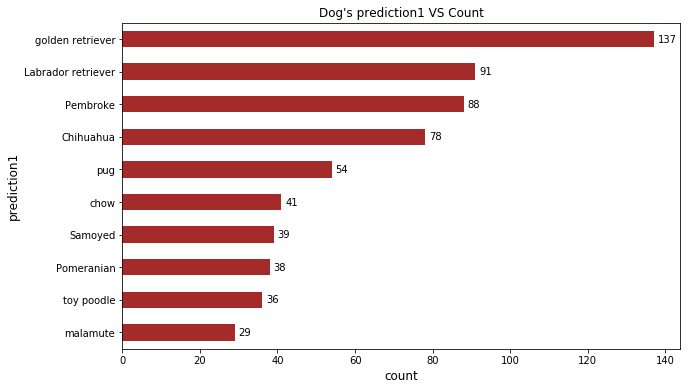

In [101]:
# Plot most common 10 Prediction 1 :
plt.figure(figsize=(10,6))
master['prediction1'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='brown')

# Set x_label, y_label and title:
plt.xlabel('count',size=12)
plt.ylabel('prediction1', size=12)
plt.title('Dog\'s prediction1 VS Count' , size=12)

# Set x & y positions to add text over each bar:
x = master['prediction1'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

In [103]:
df_twitter.prediction2.value_counts()

Labrador retriever                95
golden retriever                  81
Cardigan                          72
Chihuahua                         43
Chesapeake Bay retriever          40
French bulldog                    39
Pomeranian                        38
toy poodle                        36
Siberian husky                    33
miniature poodle                  32
cocker spaniel                    32
beagle                            27
Eskimo dog                        27
collie                            26
Pembroke                          24
kuvasz                            24
Italian greyhound                 22
Pekinese                          21
chow                              20
malinois                          20
miniature pinscher                20
American Staffordshire terrier    19
Norwegian elkhound                19
toy terrier                       19
Boston bull                       18
Samoyed                           17
pug                               17
S

Text(0,0.5,'Number of Breeds Predictions')

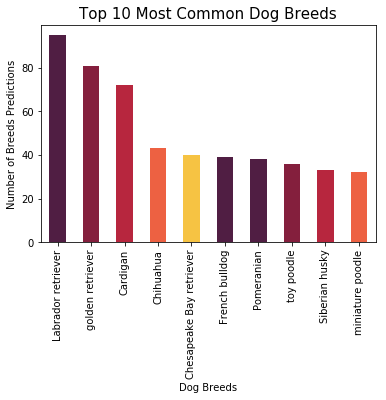

In [107]:
color3=['#501e43', '#841f3d', '#b7263e', '#ed6142', '#f6c343']
df_twitter['prediction2'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = color3)
plt.title('Top 10 Most Common Dog Breeds', size=15)
plt.xlabel('Dog Breeds')
plt.ylabel('Number of Breeds Predictions')

In [105]:
df_twitter.prediction3.value_counts()

Labrador retriever                76
Chihuahua                         57
golden retriever                  45
Eskimo dog                        36
kelpie                            33
kuvasz                            31
Staffordshire bullterrier         30
chow                              30
toy poodle                        29
beagle                            28
Pekinese                          28
cocker spaniel                    28
Pembroke                          26
Pomeranian                        26
Great Pyrenees                    25
French bulldog                    25
malamute                          25
American Staffordshire terrier    23
Cardigan                          23
Chesapeake Bay retriever          22
pug                               20
basenji                           20
bull mastiff                      19
Siberian husky                    19
toy terrier                       18
Boston bull                       17
Lakeland terrier                  16
S

Text(0,0.5,'Number of Breeds Predictions')

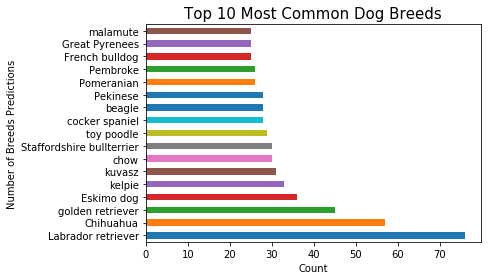

In [108]:
# Histogram to visualize dog breeeds
prediction3 = df_twitter.groupby('prediction3').filter(lambda x: len(x) >= 25)

prediction3['prediction3'].value_counts().plot(kind = 'barh')
plt.title('Top 10 Most Common Dog Breeds', size=15)
plt.xlabel('Count')
plt.ylabel('Number of Breeds Predictions')

Images of dogs were posted and the breed of dogs were predicted. The prediction was don three times, the 2 most common dog breeds are Labrador retriever and Golden retriever.

### Insight 2: The most Popular dog name

In [109]:
#checking for the most popular dog name
df_twitter['name'].value_counts()

Cooper      10
Charlie     10
Oliver      10
Tucker       9
Penny        9
Lucy         9
Sadie        8
Winston      8
Toby         7
Lola         7
Daisy        7
Stanley      6
Bo           6
Bella        6
Jax          6
Koda         6
Bailey       5
Dave         5
Oscar        5
Buddy        5
Milo         5
Leo          5
Scout        5
Rusty        5
Chester      5
Louis        5
Jack         4
Phil         4
Duke         4
Oakley       4
            ..
Clarq        1
Milky        1
Blitz        1
Philippe     1
Jett         1
Billl        1
Jareld       1
Betty        1
Tuco         1
Dobby        1
Monkey       1
Timofy       1
Asher        1
Devón        1
Spanky       1
Leonidas     1
Reptar       1
Tonks        1
Pete         1
Frönq        1
Willie       1
Tug          1
Steve        1
Maks         1
Fizz         1
Carly        1
Brandi       1
Harrison     1
Duchess      1
Noosh        1
Name: name, Length: 910, dtype: int64

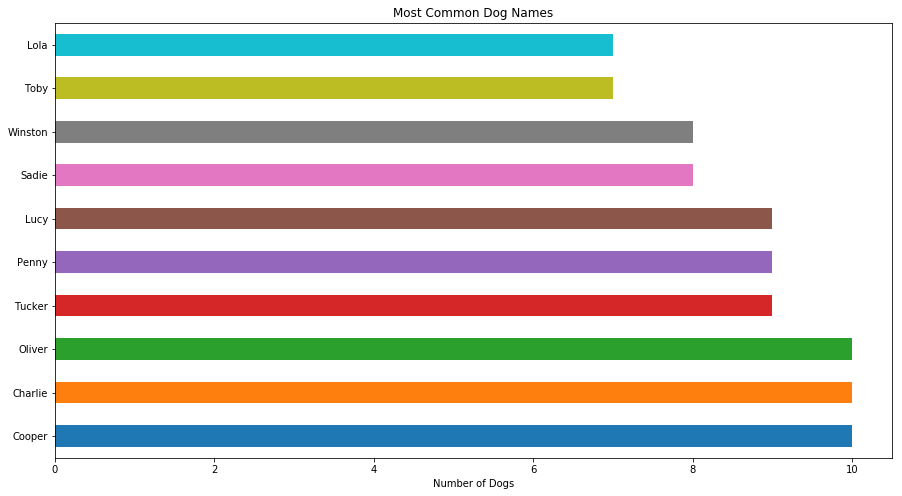

In [111]:
df_twitter.name.value_counts()[0:10].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

The most popular dog name is Cooper,Charlie and Oliver (10 dogs have the name Cooper,Charlie and Oliver )

### Insight 3: The first dog that was posted on WeRateDog page

In [468]:
df_twitter.min()

tweet_id                                             666020888022790149
timestamp                                           2015-11-15 22:32:08
text                  "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...
rating_numerator                                                      0
rating_denominator                                                    2
source_url                                           http://twitter.com
source_title                                                  TweetDeck
dog_stage                                                           NaN
favorites                                                            66
retweets                                                             11
user_followers                                                  9400633
user_favourites                                                  148513
date_time                                           2015-11-15 22:32:08
dtype: object

In [469]:
df_twitter.timestamp.min()

'2015-11-15 22:32:08'

In [470]:
df_twitter[df_twitter.timestamp ==df_twitter.timestamp.min()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title,dog_stage,favorites,retweets,user_followers,user_favourites,date_time
2088,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,NaN,2275,418,9400644,148513,2015-11-15 22:32:08


The first dog posted on WeRateDogs page is Holly and it was rated 11/10. The picture of the dog was posted on the 30th of November 2015. The dog has no pet name and the tweet was sent through an Iphone.

# Visualization

### Most common Source of Tweet

Text(0.5,1,'Source of Tweet')

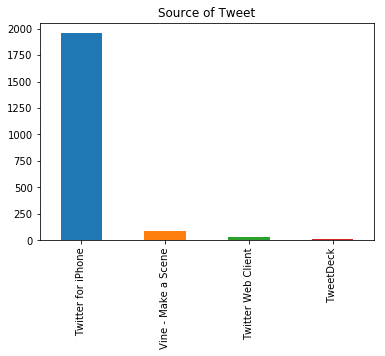

In [471]:
df_twitter['source_title'].value_counts().plot.bar();
plt.title('Source of Tweet')

### References

https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive\stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas

https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/

https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

https://notebook.community/tschinz/iPython_Workspace/00_Admin/CheatSheet/Markdown%20CheatSheet